<a href="https://colab.research.google.com/github/eovallemagallanes/Digital-Image-Processing/blob/main/lecture02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gamma Function

In [ ]:
from ipywidgets import widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets import FloatSlider, Checkbox

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import skimage
import skimage.color as skic
import skimage.filters as skif
import skimage.data as skid
import skimage.util as sku

In [ ]:
def show(img, show_hist=True, show_by_channel=False, density=False):
    dims = img.shape
    if len(dims) < 2:
        print('Not an image')
        return
    if len(dims) == 2:
        # gray scale image, require aditional last channel
        #print('Expandig last dim')
        img = np.expand_dims(img, -1)
    
    # map to uint8
    img = np.array(img, dtype = np.uint8) 

    channels = img.shape[-1] # last dim is the channel
    if channels == 3:
        labels = ['Red', 'Green', 'Blue']
        colors = ['r', 'g', 'b']
    else:
        labels = ['Gray']
        colors = ['gray']
    if show_hist:
        if show_by_channel and channels == 3:
            fig, axs = plt.subplots(2, channels + 1,
                                       figsize=(12, 6))
            
            # Display original image.
            axs[0, 0].imshow(img)
            axs[0, 0].set_axis_off()
            axs[1, 0].set_axis_off()
            for i in range(channels):
                axs[0, i+1].imshow(img[..., i])
                axs[0, i+1].set_axis_off()

            # Display the histogram.
            for i, (label, color) in enumerate(zip(labels, colors)):
                axs[1, i+1].hist(img[..., i].ravel(), lw=0, bins=256, color=color, density=density)
                axs[1, i+1].set_xlim(0, img[..., i].max())
                axs[1, i+1].set(xlabel=label)
                axs[1, i+1].set_yticks([])
        
            plt.show()
        else:
            # Display the image.
            fig, axs = plt.subplots(1, channels + 1,
                                        figsize=(12, 3))
        
            if channels == 3:
                axs[0].imshow(img)
            if channels == 1:
                axs[0].imshow(img[..., 0], cmap='gray')
            axs[0].set_axis_off()
        
            # Display the histogram.
            for i, (label, color) in enumerate(zip(labels, colors)):
                axs[i+1].hist(img[..., i].ravel(), lw=0, bins=256, color=color, density=density)
              
        
            plt.show()
    else:
        # Display the image.
        fig = plt.figure(figsize=(3, 3))
        if channels == 3:
            plt.imshow(img)
        if channels == 1:
            plt.imshow(img[..., 0], cmap='gray')
        plt.axis('off')

In [ ]:
def contrast(img):
    immax = np.max(img)
    immin = np.min(img)
    #print('Max int: ', immax, 'Min int: ', immin)
    c = (immax - immin)/(immax + immin)
    return c

**GAMMA FUNCTION**

The Gamma transformation have the basic form

$G(x) = kx^\gamma,$ (1)

where $x$ is the input image, $k$ and $\gamma$ are positive constants.

However, this formulation is sensitive to numerical overflow, e.g., a pixel intensity may be greater than $2^8 (255)$.

We can rewrite this equation such that

$G(x) = 255*(\frac{x}{max(x)})^\gamma,$ (2)

in such a way, before applying the power operation, we normalize the image value to be in a range of $[0, 1]$, so the output will be in a range of $[0, 255]$.

Moreover, when the gamma correction is employed in a RGB image, some artifacts could appear, such as *false colors*. Instead of employing a constant factor (255), we can employ the intensity image or gray-scale image $\bar{x}$ as follows:

$G(x) = \bar{x}(\frac{(x + \epsilon)}{(\bar{x} + \epsilon)})^\gamma,$ (3)

where $\epsilon$ is a small value to avoid zero division.


---
* Notice that in Eq. (2), when $\gamma = 0$, the output is a white image (all values in 255)
* On the other hand, in Eq(3), when $\gamma = 0$, the output is the gray-scale image. 
---

In [ ]:
def gamma(img, g, display=True):
    min_img, max_img = np.min(img), np.max(img)
    img2 = 255*((img - min_img)/(max_img - min_img))**g

    if display:
        show(img2)
    
    return img2

In [ ]:
# working in range [0.0, 255.0]
img = skimage.img_as_float(skid.chelsea())*255.0
# read from file
#skimage.io.imread('address.jpeg') 

# convert to gray-scale image
gray_img = skic.rgb2gray(img)

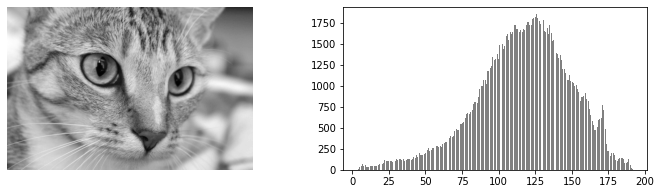

Contrast:  0.9607625246391768


In [ ]:
show(gray_img)
print('Contrast: ', contrast(gray_img))

In [ ]:
gamma_widget = FloatSlider(min=0.0, max=4.0, step=0.1, value=1.4, continuous_update=False)

w = interactive(gamma,img=fixed(gray_img), g=gamma_widget, display=True);
display(w)

interactive(children=(FloatSlider(value=1.4, continuous_update=False, description='g', max=4.0), Checkbox(valu…

In [ ]:
def gammaRGB(img, g, by_channel):
    dims = img.shape
    if len(dims) !=3:
        print('Not RGB image')
        #return img
    
    if by_channel:
        img_rg = gamma(img[..., 0], g, False)
        img_gg = gamma(img[..., 1], g, False)
        img_bg = gamma(img[..., 2], g, False)

        img2 = np.stack([img_rg, img_gg, img_bg], axis=-1)
        
    else:
        eps = 1.0
        gray_img = skic.rgb2gray(img)
        gray_img= np.expand_dims(gray_img, axis=-1)

        img2 = gray_img*((img + eps)/(gray_img + eps))**g

        img2 = np.clip(img2, 0, 255)
    
        
    show(img2)

    print('Contrast RGB: ', (contrast(img2[..., 0]), contrast(img2[..., 1]), contrast(img2[..., 2])))
    return img2

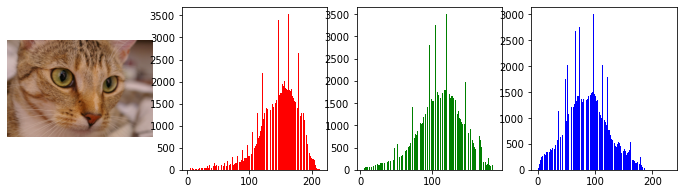

Contrast RGB:  (0.9815668202764977, 0.9585492227979274, 1.0)


In [ ]:
show(img)
print('Contrast RGB: ', (contrast(img[..., 0]), contrast(img[..., 1]), contrast(img[..., 2])))

In [ ]:
gamma_channel_widget = Checkbox( value=False, description='Gamma by channel', disabled=False, indent=False)
gamma_widget2 = FloatSlider(min=0.0, max=4.0, step=0.1, value=1.4, continuous_update=False)

w2 = interactive(gammaRGB,img=fixed(img), g=gamma_widget2, by_channel=gamma_channel_widget);
display(w2)

interactive(children=(FloatSlider(value=1.4, continuous_update=False, description='g', max=4.0), Checkbox(valu…